In [28]:
import pandas as pd
from sklearn.svm import NuSVR, SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

from simulated_annealing import simulate_annealing
from gradient_descent import gradient_descent
from PSO import pso

### Data preprocessing

In [29]:
df =  pd.read_csv(r"C:\Users\123na\Downloads\Projects\Ayaan_GKG\AISI_1045_optimal_machining\AISI_1045_Steel.csv")
df.drop(labels = 'index', axis = 1, inplace = True)

In [30]:
data = df.values

In [31]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [32]:
x = data.T[:3].T
y = data.T[3:].T

In [33]:
xtrain, xtest, ytrain, ytest = x[:25], x[25:], y[:25], y[25:]

### Training the SVR model

In [34]:
model = NuSVR(C = 5, nu = 0.20, kernel = 'rbf')
model = MultiOutputRegressor(model)

model.fit(xtrain, ytrain)

MultiOutputRegressor(estimator=NuSVR(C=5, nu=0.2))

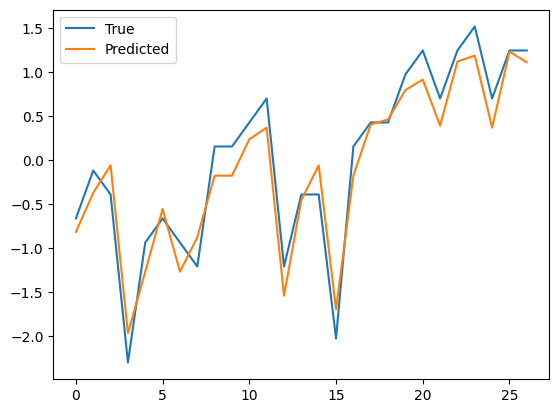

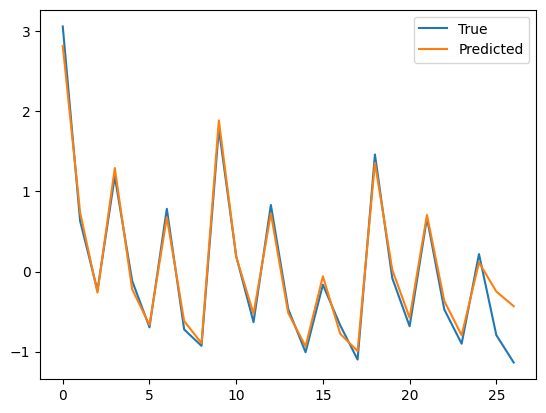

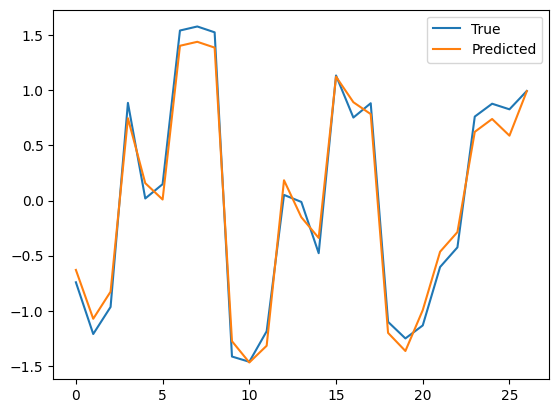

In [35]:
ypred = model.predict(x)

for i in range(3):
    plt.plot(y.T[i], label = "True")
    plt.plot(ypred.T[i], label = "Predicted")
    plt.legend()
    plt.show()

### Training the NN

In [36]:
input_layer = tf.keras.layers.Input(shape = (3,))
layer = tf.keras.layers.Dense(units = 32, activation = 'linear')(input_layer)
layer = tf.keras.layers.Dense(units = 32, activation = 'linear')(layer)
layer = tf.keras.layers.Dense(units = 32, activation = 'linear')(layer)
output_layer = tf.keras.layers.Dense(units = 3, activation = 'linear')(layer)

nn = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [37]:
nn.compile(optimizer = 'adam', loss = 'mse')
nn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                128       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2339 (9.14 KB)
Trainable params: 2339 (9.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = nn.fit(x, y, epochs = 10, validation_split = 0.15, verbose = False)

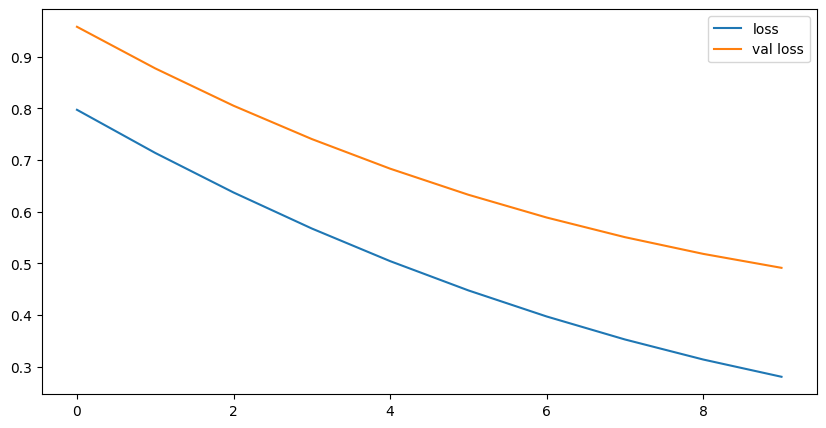

In [39]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

In [40]:
ypred = nn.predict(x)

1/1 [==============================] - 0s 133ms/step


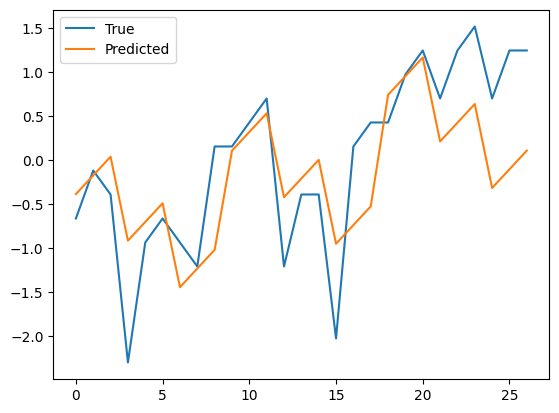

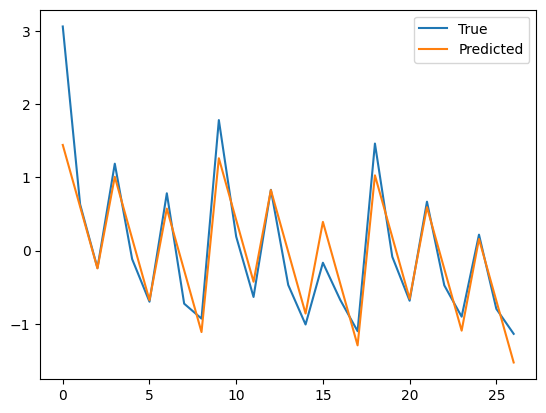

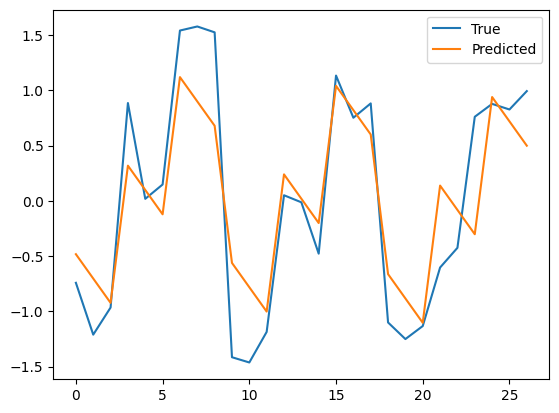

In [41]:
for i in range(3):
    plt.plot(y.T[i], label = "True")
    plt.plot(ypred.T[i], label = "Predicted")
    plt.legend()
    plt.show()

#### saving the model

In [42]:
# #save
# with open('model_AISI_1045.pkl','wb') as f:
#     pickle.dump(model,f)

# #load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

### Simulated annealing

In [43]:
# best_solution = np.array([x[24]])
# best_solution = np.array([[-0.10175443, -1.22474487,  0.        ,  0.42443734,  0.19172098]])
best_solution = np.array([[-0.10175443, -1.22474487,  0.        ]])

In [44]:
def func(input):
    result = model.predict(input)
    return np.array([np.linalg.norm(result)])

In [45]:
initial_solution = 5.0
initial_temperature = 1000
cooling_rate = 0.95
iterations = 1000

SimAnnealing = simulate_annealing(input_size = 3, upper_bound = 0.1, lower_bound = -0.1)

In [46]:
for i in range(20):
    best_params, best_roughness = SimAnnealing.simulated_annealing(func, best_solution, initial_temperature, cooling_rate, iterations)
    print(best_params, best_roughness)

[[ 3.33234149 -1.58143738  1.50017101]] [0.36808891]
[[ 0.72187199  0.3004639  -0.71299535]] [0.01228209]
[[-2.13885445 -0.87825257  1.69647621]] [0.12054001]
[[ 0.71395342  0.30660089 -0.71851135]] [0.01602928]
[[ 3.33363514 -1.5592767   1.49412395]] [0.36810136]
[[-2.15269974 -0.86795539  1.6864924 ]] [0.12054461]
[[ 0.70513929  0.30473714 -0.70729626]] [0.01777925]
[[ 0.70786037  0.29589946 -0.69356783]] [0.0136749]
[[ 0.72924094  0.31068342 -0.71327308]] [0.01477148]
[[ 0.71424067  0.2951436  -0.70784443]] [0.01317882]
[[-2.17107631 -0.87022941  1.66854998]] [0.12063078]
[[ 0.72728642  0.32193696 -0.72630267]] [0.01685081]
[[ 0.72951857  0.30822554 -0.72419652]] [0.01377176]
[[ 0.07988998 -0.02077825  2.83765687]] [0.00597657]
[[ 3.32507167 -1.59030937  1.49584908]] [0.3680985]
[[-2.1422703  -0.88636333  1.69754653]] [0.120593]
[[ 0.73960988  0.31158397 -0.72475191]] [0.02379606]
[[ 0.71827644  0.30324353 -0.72689778]] [0.02222897]
[[ 0.71858433  0.30695856 -0.7113754 ]] [0.0010979

### Gradient Descent

In [47]:
GD = gradient_descent(func, best_solution, delta = 1e-5, learning_rate = 0.008, num_iterations = 1500)

In [48]:
func(GD)

array([1.32763954])

In [49]:
GD 

array([[ 0.77584636, -0.34714408,  0.87760079]])

### PSO

In [50]:
def function(x):
    return model.predict(np.array([x]))

In [51]:
num_particles = 300
num_dimensions = 3
num_iterations = 100
min_bound = -10
max_bound = 10
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

In [57]:
for i in range(10):
    global_best, personal_best = pso(function, num_particles, num_dimensions, num_iterations, min_bound, max_bound, inertia_weight, cognitive_weight, social_weight)

    print(f"The attempt is {i + 1}")
    print("Global Best Solution:", global_best)
    print("Value at Global Best:", function(global_best))

### Checking the results

In [ ]:
'''  Best results from various optimization algortihms  '''

# Simulated Annealing
a1 = np.array([[ 0.65977887, -1.51922655,  0.3617742,   0.53855313,  0.06331636, -1.55043603]])
# Simple gradient descent
a2 = np.array([[-0.03372262, -1.15671306,  0.06803181,  0.49246915,  0.25975279, -1.41270204]])
# Monte Carlo Particle Swarm optimization
a3 = np.array([[0.64786809, -1.5191499,   0.35439371,  0.54339988,  0.04122399, -1.55068678]])

A1 = scaler.inverse_transform(a1).astype('float16')
A2 = scaler.inverse_transform(a2).astype('float16')
A3 = scaler.inverse_transform(a3).astype('float16')

print(A1, A2, A3)

[[1.564e+02 1.104e-01 1.147e+00 8.740e-01 1.138e+01 1.191e+00]] [[1.3625e+02 1.2219e-01 1.0273e+00 8.7256e-01 1.2414e+01 1.3184e+00]] [[1.560e+02 1.104e-01 1.145e+00 8.745e-01 1.127e+01 1.190e+00]]


In [ ]:
# Best results are from Simulated Annealing and Particle Swarm Optimization